# Imports of libraries

In [1]:
import pandas as pd
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Get the data

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data exploration

In [4]:
data.shape

(31962, 3)

There are 31.962 data points in the data base. Next it is important to see the distribution of the labels.

A graphic of the distribution of the tweets might help understand better.

Count of values:
 0    29720
1     2242
Name: label, dtype: int64


Text(0.5, 1.02, 'Distribution of classes of tweets')

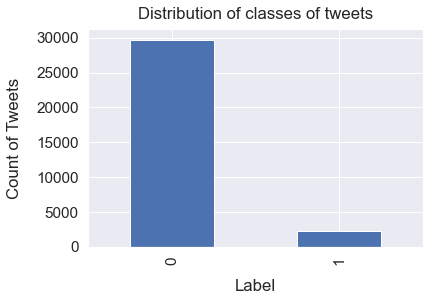

In [5]:
print("Count of values:\n",data.label.value_counts())
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='bar')
plt.xlabel("Label", labelpad=14)
plt.ylabel("Count of Tweets", labelpad=14)
plt.title("Distribution of classes of tweets", y=1.02)

There is a lot more tweets lbeled as 0 (non violent) than labeled as 1 (violent). For the classification model there will be necessary to balance the dataset. 


For the next part the tweets are to be explored, since it is difficult to explore the text within many tweets it is proposed to analyse by the construction of a wordcloud for each label.

First some words processing is needed to eliminate characters that are not legible. Regex is used to create a function that compile and eliminates characters that are not legible or not interesting for our analysis.

In [6]:
def tweet_to_words(tweet):
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    words = re.sub("(?P<url>https?://[^\s]+)"," ",tweet)
    words = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",words)
    words = REPLACE_NO_SPACE.sub("", words.lower())
    words = REPLACE_WITH_SPACE.sub(" ", words)
    words = str(words)
    return words

In [7]:
data["processed_tweet"] = data["tweet"].apply(tweet_to_words)

In [8]:
data.head()

,id,label,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [13]:
data.to_csv("data/processed_train.csv",index=False)

Now, with the processed tweets a string can be created for both categories violent(1) or normal(0)

In [37]:
normal_tweets = ""
violent_tweets = ""

for i in range(len(data)):
    if data.label[i] == 0:
        normal_tweets = normal_tweets + data.processed_tweet[i] + " "
    else:
        violent_tweets = violent_tweets + data.processed_tweet[i] + " "

For the wordcloud to be meaningfull it is necessary to eliminate "stopwords" as much as possible. These words are the ones that are frequently used in text but don't have a powerfull meaning within the sentence. 

The stopwords are constructed by the help of the Natural Language Kit (NLKT) library and additional words found on internet ressources as well as out additional words.

In [64]:
with open("data/stopwords_english.txt", "r",encoding = "utf-8") as f:
        stpw_english = f.readlines()
        stpw_english = str.split(stpw_english[0],",")

stopwords_en= stpw_english + list(stopwords.words("english"))

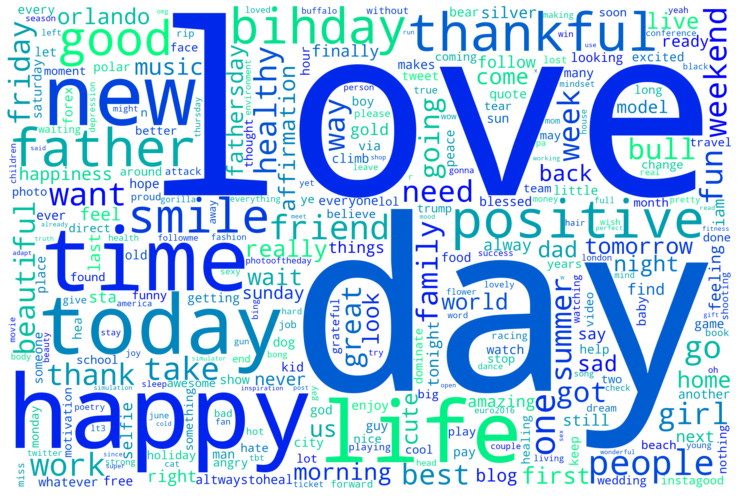

In [61]:
word_cloud_normal = WordCloud(background_color="white",width=3000, height=2000,colormap = "winter", max_words=300,
                       stopwords = stopwords_en, collocations=False).generate(normal_tweets)

plt.figure(figsize=[13,10])
plt.axis("off")
plt.imshow(word_cloud_normal,interpolation="bilinear")

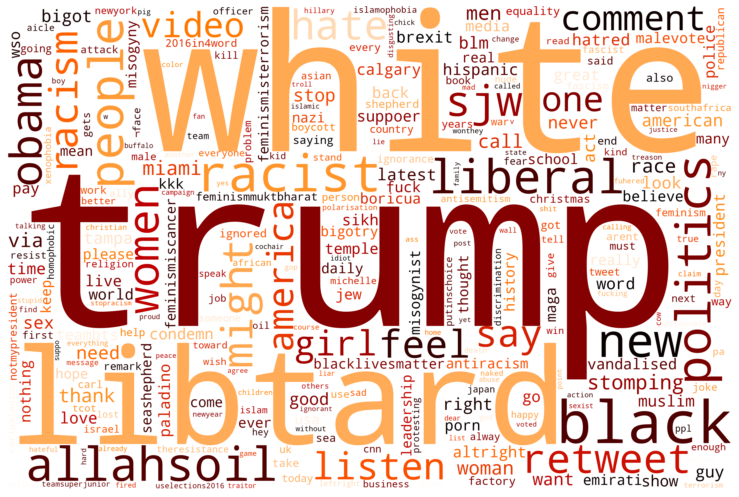

In [66]:
word_cloud_violent = WordCloud(background_color="white",width=3000, height=2000,colormap = "gist_heat", max_words=300,
                       stopwords = stopwords_en, collocations=False).generate(violent_tweets)

plt.figure(figsize=[13,10])
plt.axis("off")
plt.imshow(word_cloud_violent,interpolation="bilinear")